In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"

df = pd.read_csv(URL, index_col='Country')

df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [41]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
# years = list(map(str, range(1980, 2014)))
years = np.arange(1980,2014)

years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

# Line Plot

A line plot displays the relationship between two continuous variables over a continuous interval, showing the trend or pattern of the data.<br><br>Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a line plot directly on **axes** by calling plot function **plot()**


In [43]:
years = list(map(str, years))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [51]:
total_immigrants = df[years].sum()

total_immigrants = total_immigrants.to_frame()
total_immigrants.reset_index(inplace=True)
total_immigrants.columns = ["Years", "Total"]

total_immigrants.set_index('Years', inplace=True)

total_immigrants.index = total_immigrants.index.map(int)

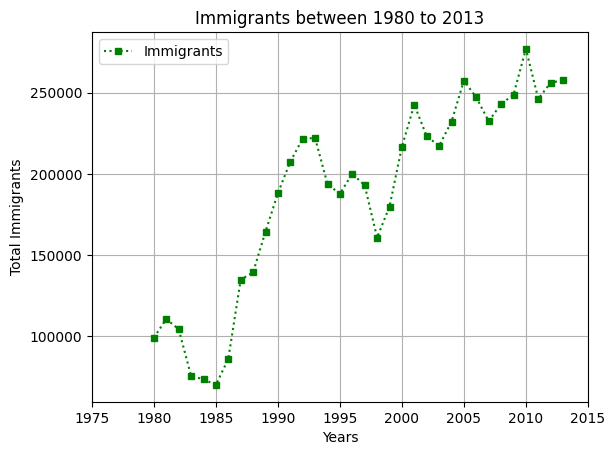

In [54]:
# create figure
fig, ax = plt.subplots()

ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#limits on x-axis
plt.xlim(1975, 2015)  #or ax.set_xlim()

#Enabling Grid
plt.grid(True)  #or ax.grid()

#Legend
plt.legend(["Immigrants"]) #or ax.legend()


Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

### Question: Plot a line graph of immigration from Haiti 

You be required to create a dataframe where the name of the 'Country' is equal to 'Haiti' and years from 1980 - 2013<br> Also you will be required to transpose the new dataframe in to a series for plotting<br>Might also have to change the type of index of the series to integer for a better look of the plot<br> Then create fig and ax and call function plot() on the data.


In [64]:
df_haiti = df.loc[['Haiti'], years].transpose()
df_haiti.reset_index(inplace=True)
df_haiti.columns = ['Years', 'Total']
df_haiti.set_index("Years", inplace=True)
df_haiti.index = df_haiti.index.map(int)

df_haiti.head()

,Total
Years,
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


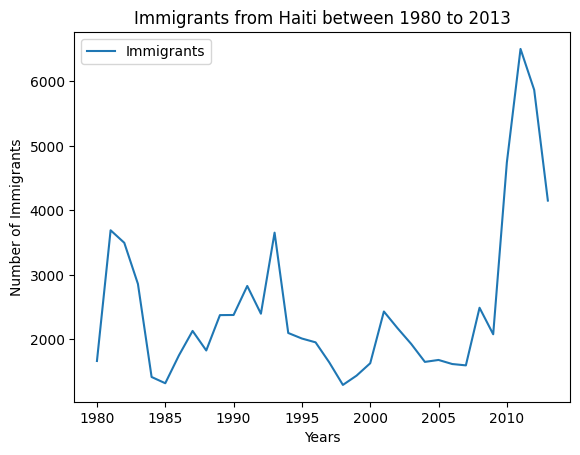

In [66]:
#Plotting the line plot on the data
fig, ax = plt.subplots()
ax.plot(df_haiti)

#Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

#Enabling Grid and ticks
#plt.grid(True)  #or ax.grid()
#ax.set_xticks(list(range(n, m, s)))

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

# Scatter Plot

A scatter plot visualizes the relationship between two continuous variables, displaying individual data points as dots on a two-dimensional plane, allowing for the examination of patterns, clusters, and correlations.<br><br>Let's created a *Scatter plot* to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a scatter plot directly on **ax** by calling plot function **scatter()**

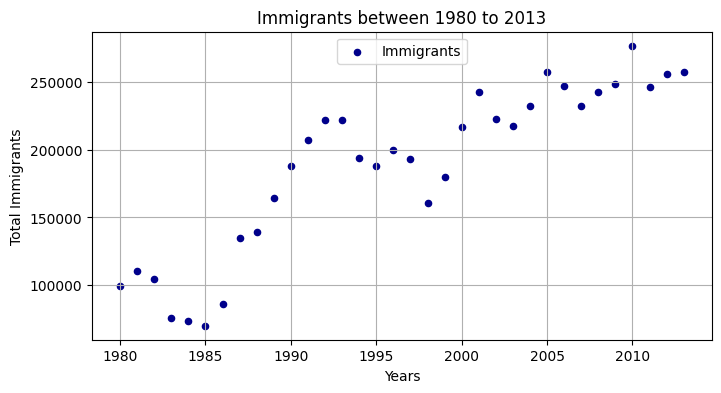

In [69]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

# Bar Plot

A bar plot represents categorical data with rectangular bars, where the height of each bar corresponds to the value of a specific category, making it suitable for comparing values across different categories.<br><br>Let's create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. 
<br><br>Apply sort_values function on the 'Total' column of our data<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe and can create a separatedataframe for top five countries<br><br>You can further use the names of the countries to label each bar on the plot

In [75]:
df_top5 = df.sort_values(by="Total", ascending=False).head()

df_top5.reset_index(inplace=True)

label = list(df_top5.Country)
label[2] = 'UK'
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

Text(0.5, 0, 'Years')

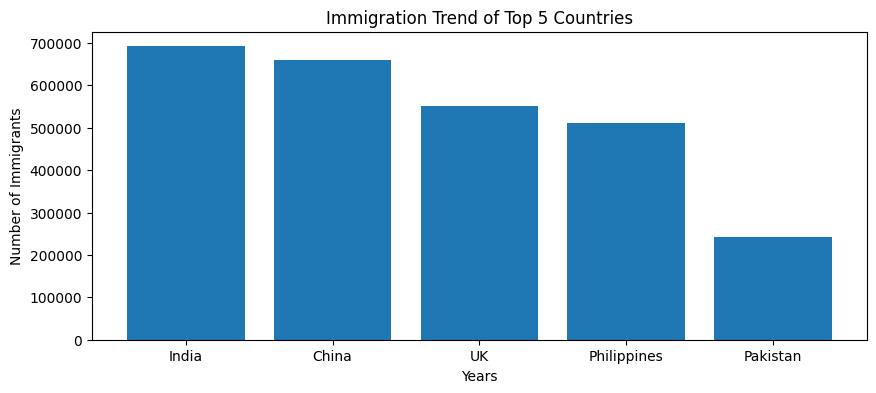

In [76]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df_top5['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


### Question: Create a bar plot of the 5 countries that contributed the **least** to immigration to Canada **from** 1980 to 2013. 

In [79]:
bottom5 = df.sort_values(by="Total", ascending=False).tail()

bottom5.reset_index(inplace=True)

label = list(bottom5.Country)

label

['San Marino', 'New Caledonia', 'Marshall Islands', 'Western Sahara', 'Palau']

<BarContainer object of 5 artists>

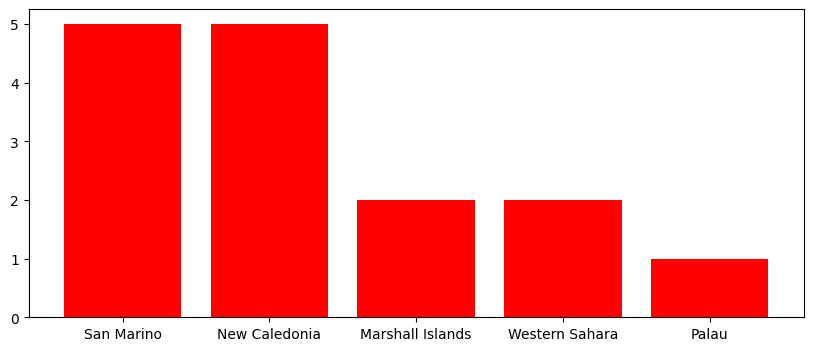

In [83]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, bottom5['Total'], label=label, color='red')

# Histogram

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.
<br><br>Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?<br>

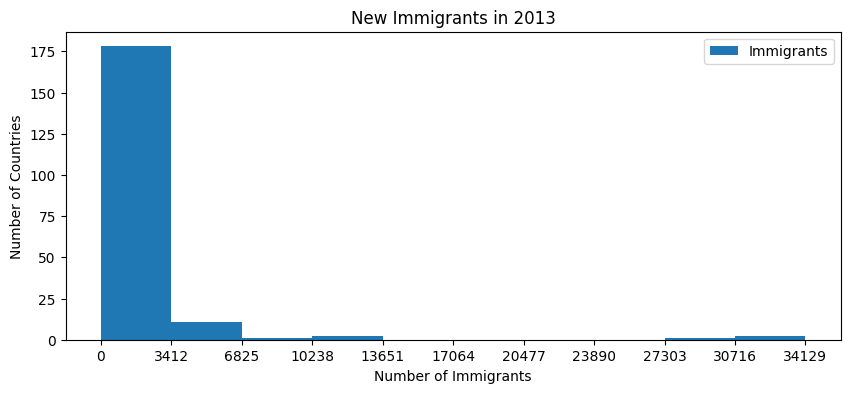

In [90]:
df_country = df.groupby(['Country'])['2013'].sum().reset_index()

#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
count = ax.hist(df_country['2013'])

#you can check the arrays in count with indexing count[0] for count, count[1] for bins

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int,count[1])))
ax.legend(['Immigrants'])

#### We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

#### What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [96]:
df_dns = df.groupby(['Country'])[years].sum()
df_dns = df_dns.loc[['Denmark', 'Norway', 'Sweden'], years]

df_dns = df_dns.T   # transpose

df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


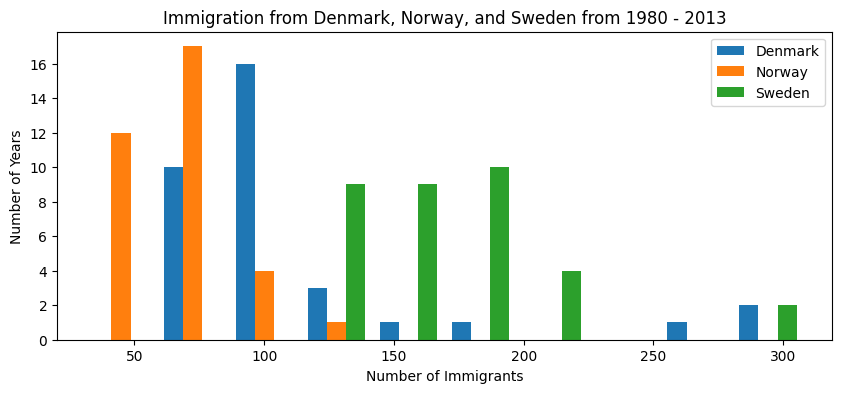

In [97]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])
#Display the plot
plt.show()

### Question: What is the immigration distribution for China and India for years 2000 to 2013?

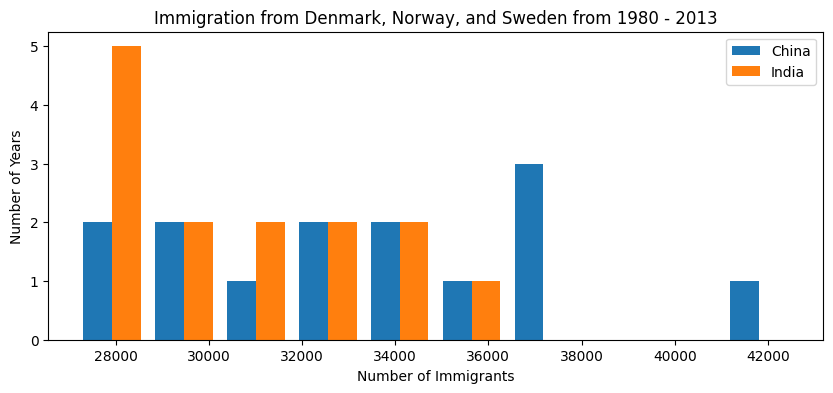

In [98]:
df_ci = df.groupby(['Country'])[years].sum()
y=list(map(str,range(2000, 2014)))

df_ci=df_ci.loc[['China', 'India'], y]
df_ci=df_ci.T

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_ci)

ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['China', 'India'])

# Pie Chart<a id="14"></a>

A pie chart represents the proportion or percentage distribution of different categories in a dataset using sectors of a circular pie.
<br> Let's create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985


In [ ]:
fig,ax=plt.subplots()

#Pie on immigrants
ax.pie(total_immigrants[0:5], labels=years[0:5], 
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%',explode = [0,0,0,0,0.1]) #using explode to highlight the lowest 

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]), include legend, if you donot want to pass the labels

In [116]:
pie = total_immigrants[:5]
pie.reset_index(inplace=True, drop=True)

pie.Years.tolist()

[1980, 1981, 1982, 1983, 1984]

Text(0.5, 1.0, 'Distribution of Immigrants from 1980 to 1985')

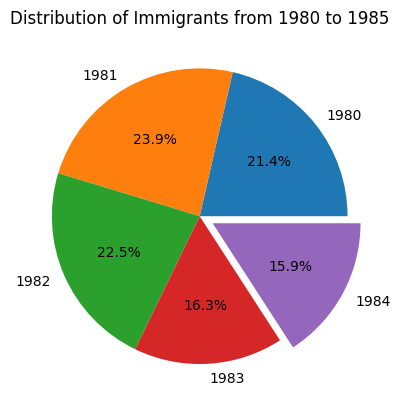

In [122]:
df_pie = total_immigrants[:5]
df_pie.reset_index(inplace=True, drop=True)

fig,ax=plt.subplots()

ax.pie(df_pie['Total'], labels=df_pie.Years.tolist(), autopct='%1.1f%%',explode = [0,0,0,0,0.1])

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]), include legend, if you donot want to pass the labels

### Question: Create a pie chart representing the total immigrants proportion for each continent

First, you will have to group the data over continents and get the sum on total. Then you can pass this data to the pie function

In [123]:
#Creating data for plotting pie
df_con=df.groupby('Continent')['Total'].sum().reset_index()
label=list(df_con.Continent)
label[3] = 'LAC'
label[4] = 'NA'
df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


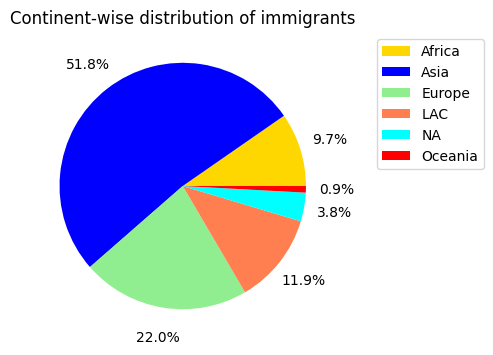

In [124]:
fig,ax=plt.subplots(figsize=(10, 4))

#Pie on immigrants
ax.pie(df_con['Total'], colors = ['gold','blue','lightgreen','coral','cyan','red'],
        autopct='%1.1f%%', pctdistance=1.25)

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Continent-wise distribution of immigrants')
ax.legend(label,bbox_to_anchor=(1, 0, 0.5, 1))

# Sub-plotting

Let us explore how to display more than one plot on the same figure and specify the number of rows and columns to be created to the subplots function.  

For instance, let’s create a line and scatter plot in one row <br>
plt.subplots() <br>
You can use the same functions using which you plotte lne and scatter plots at the start of this lab
<br>
Both the subplots will be sharing the same y-axis as the data in the y-axis is the same. So, assign the ‘Sharey’ parameter as True in the code below. Also notice the use of 'suptitle'

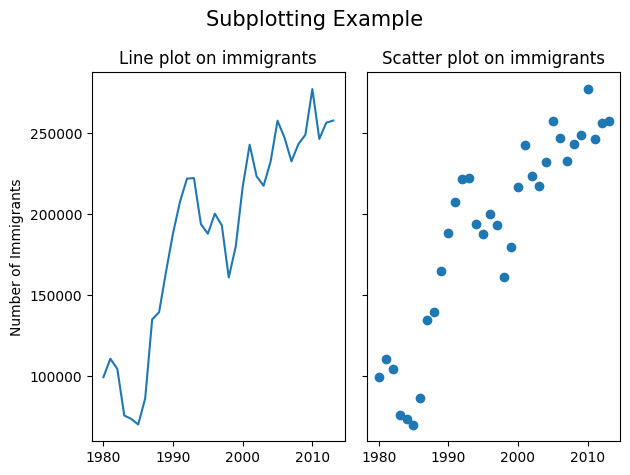

In [133]:
# Create a figure with two axes in a row
total_immigrants.set_index("Years", inplace=True)

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()


You can also implement the subplotting with add_subplot() as below:-

Text(0.5, 1.0, 'Bar plot on immigrants')

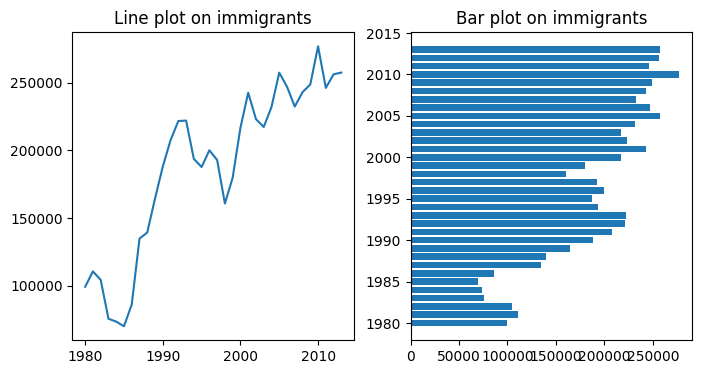

In [141]:
# Create a figure with Four axes - two rows, two columns

fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants.Total) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")

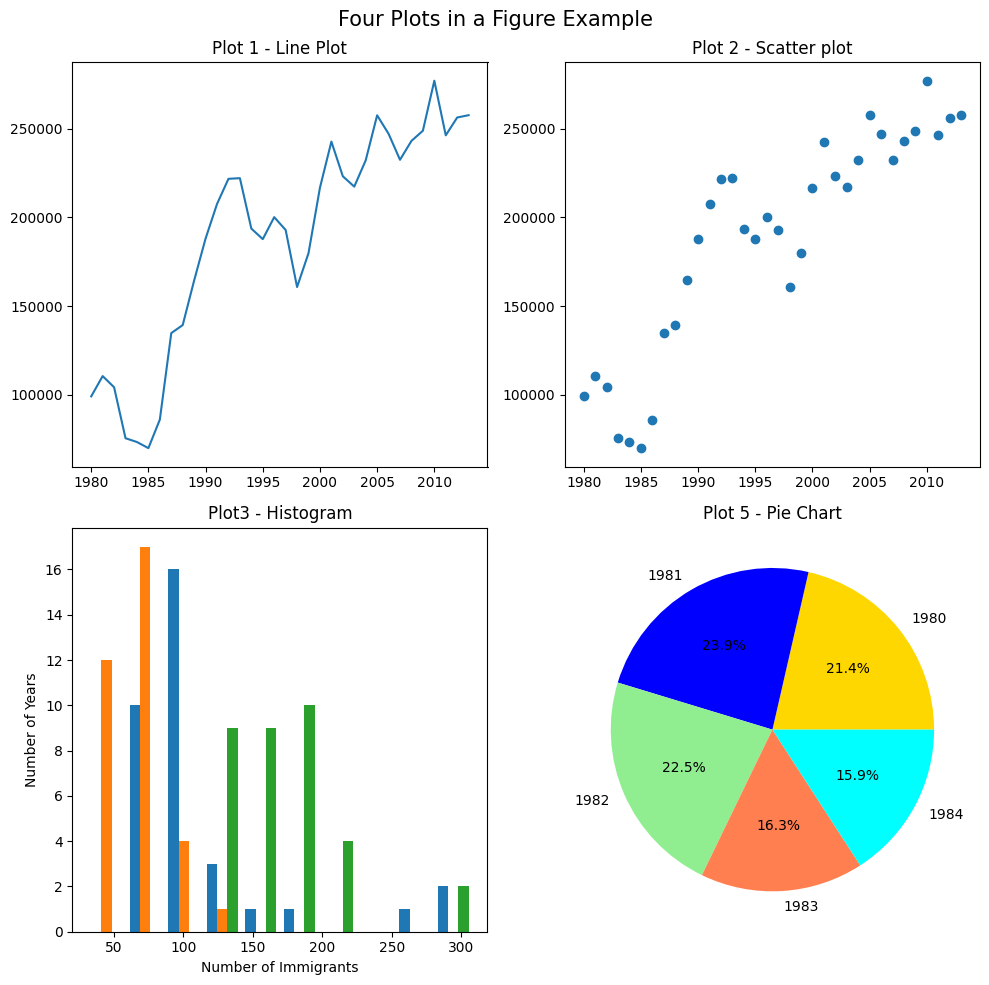

In [145]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(10, 10))

# Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrants)
ax1.set_title('Plot 1 - Line Plot')

# Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrants.index, total_immigrants)
ax2.set_title('Plot 2 - Scatter plot')

# Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_dns)
ax3.set_title('Plot3 - Histogram') 
ax3.set_xlabel('Number of Immigrants')
ax3.set_ylabel('Number of Years')

# Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(df_pie['Total'], labels=df_pie.Years.tolist(), 
        colors = ['gold','blue','lightgreen','coral','cyan'],
        autopct='%1.1f%%')
ax4.set_aspect('equal')  
ax4.set_title('Plot 5 - Pie Chart')

#Adding a Title for the Overall Figure
fig.suptitle('Four Plots in a Figure Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
# plt.show()